In [44]:
import json
import pandas as pd
from datetime import datetime
start_time=datetime.now()

In [45]:
with open('stage2.json') as f:
    data=json.load(f)
    

In [46]:
df=pd.DataFrame(data)

In [47]:
df.head()

,id,id_str,full_text,source,source_url,retweet_count,favorite_count,lang,full_text_lemmatiz
0,1465948889761173507,1465948889761173507,explosive—we learn trump tested positive covid...,Twitter for iPhone,http://twitter.com/download/iphone,5273,11800,en,"[explosive—we, learn, trump, tested, positive,..."
1,1466046988500230146,1466046988500230146,learn wise guy mocked joe biden presidential d...,Twitter for iPhone,http://twitter.com/download/iphone,1964,6256,en,"[learn, wise, guy, mocked, joe, biden, preside..."
2,1466089777938280452,1466089777938280452,covid update total tests conducted last hrs ne...,Hootsuite Inc.,https://www.hootsuite.com,593,624,en,"[covid, update, total, test, conducted, last, ..."
3,1466385507298983942,1466385507298983942,early south african data say omicron amp reinf...,Twitter Web App,https://mobile.twitter.com,44,0,en,"[early, south, african, data, say, omicron, am..."
4,1466385504690008070,1466385504690008070,largestvaccinedrive achieves another milestone...,Twitter for Android,http://twitter.com/download/android,41,0,en,"[largestvaccinedrive, achieves, another, miles..."


In [48]:
# word_cloud
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text):

    # Create WordCloud 
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='white',  
                           min_font_size = 12).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # show plot
    plt.show()

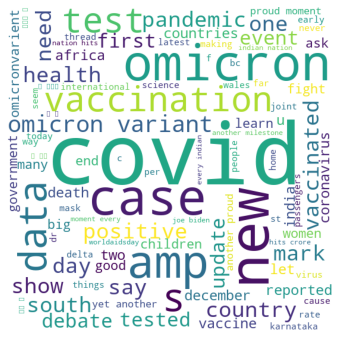

In [49]:
paragraph=' '.join(df['full_text'].tolist())
word_cloud(paragraph)

In [50]:
from textblob import TextBlob
def sentiment(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
    return TextBlob(text).sentiment.polarity

df['sentiment']= df['full_text'].apply(sentiment)
df['polarity']= df['full_text'].apply(polarity)



In [51]:
df.head()

,id,id_str,full_text,source,source_url,retweet_count,favorite_count,lang,full_text_lemmatiz,sentiment,polarity
0,1465948889761173507,1465948889761173507,explosive—we learn trump tested positive covid...,Twitter for iPhone,http://twitter.com/download/iphone,5273,11800,en,"[explosive—we, learn, trump, tested, positive,...",0.469697,-0.005682
1,1466046988500230146,1466046988500230146,learn wise guy mocked joe biden presidential d...,Twitter for iPhone,http://twitter.com/download/iphone,1964,6256,en,"[learn, wise, guy, mocked, joe, biden, preside...",0.592929,0.392424
2,1466089777938280452,1466089777938280452,covid update total tests conducted last hrs ne...,Hootsuite Inc.,https://www.hootsuite.com,593,624,en,"[covid, update, total, test, conducted, last, ...",0.484242,0.027273
3,1466385507298983942,1466385507298983942,early south african data say omicron amp reinf...,Twitter Web App,https://mobile.twitter.com,44,0,en,"[early, south, african, data, say, omicron, am...",0.150000,0.050000
4,1466385504690008070,1466385504690008070,largestvaccinedrive achieves another milestone...,Twitter for Android,http://twitter.com/download/android,41,0,en,"[largestvaccinedrive, achieves, another, miles...",1.000000,0.100000


In [52]:
def sentiment_analysis(x):
    if x < 0:
        return 'NEGATIVE'
    elif x > 0:
        return 'POSITIVE'
    else:
        return 'ZERO'
    
df['sentiment_analysis'] = df['polarity'].apply(sentiment_analysis)
df

,id,id_str,full_text,source,source_url,retweet_count,favorite_count,lang,full_text_lemmatiz,sentiment,polarity,sentiment_analysis
0,1465948889761173507,1465948889761173507,explosive—we learn trump tested positive covid...,Twitter for iPhone,http://twitter.com/download/iphone,5273,11800,en,"[explosive—we, learn, trump, tested, positive,...",0.469697,-0.005682,NEGATIVE
1,1466046988500230146,1466046988500230146,learn wise guy mocked joe biden presidential d...,Twitter for iPhone,http://twitter.com/download/iphone,1964,6256,en,"[learn, wise, guy, mocked, joe, biden, preside...",0.592929,0.392424,POSITIVE
2,1466089777938280452,1466089777938280452,covid update total tests conducted last hrs ne...,Hootsuite Inc.,https://www.hootsuite.com,593,624,en,"[covid, update, total, test, conducted, last, ...",0.484242,0.027273,POSITIVE
3,1466385507298983942,1466385507298983942,early south african data say omicron amp reinf...,Twitter Web App,https://mobile.twitter.com,44,0,en,"[early, south, african, data, say, omicron, am...",0.150000,0.050000,POSITIVE
4,1466385504690008070,1466385504690008070,largestvaccinedrive achieves another milestone...,Twitter for Android,http://twitter.com/download/android,41,0,en,"[largestvaccinedrive, achieves, another, miles...",1.000000,0.100000,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1466385233033318400,1466385233033318400,point noted omicron omicronvarient covid,Twitter for Android,http://twitter.com/download/android,5,0,en,"[point, noted, omicron, omicronvarient, covid]",0.000000,0.000000,ZERO
96,1466385232387575816,1466385232387575816,trump test positive covid debate cv fake news ...,Twitter for Android,http://twitter.com/download/android,0,0,en,"[trump, test, positive, covid, debate, cv, fak...",0.681818,0.075758,POSITIVE
97,1466385227543203847,1466385227543203847,covid deaths wales falling recent weeks reduct...,Twitter for Android,http://twitter.com/download/android,12,0,en,"[covid, death, wale, falling, recent, week, re...",0.250000,0.000000,ZERO
98,1466385226750431234,1466385226750431234,man lied covid meeting gold star families disg...,Twitter for Android,http://twitter.com/download/android,2,0,en,"[man, lied, covid, meeting, gold, star, family...",1.000000,-1.000000,NEGATIVE


In [53]:
end_time=datetime.now()
print('Duration: {}'.format(end_time-start_time))

Duration: 0:00:16.758103


In [54]:
df.to_csv('final.csv')